# Training Simple Machine Learning Algorithms for Classification

### Libraries

In [59]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris

# Viz
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

### Utilities

In [93]:
def plot_decision_regions(X, y, classifier, resolution=0.02):
    # Setup marker generator and color map.
    markers = ('o', 's', '^', 'v', '<')
    colors = ('lightgreen', 'orange', 'cyan', 'gray', 'blue')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    
    xx1, xx2 = np.meshgrid(
        np.arange(x1_min, x1_max, 0.02),
        np.arange(x2_min, x2_max, 0.02))
    
    lab = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    lab = lab.reshape(xx1.shape)
    plt.contourf(xx1, xx2, lab, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0],
                y=X[y == cl, 1],
                alpha=0.8,
                c=colors[idx],
                marker=markers[idx],
                label=f'Class {cl}',
                edgecolor='black')

### Implementing a perceptron learning algorithm in Python

In [8]:
class Perceptron:
    """Perceptron classifier.
    
    Parameters
    ----------
    eta : float
        Learning rate (between 0.0 and 1.0)
    n_iter : int
        Passes over the training dataset.
    random_state : int
        Random number generator seed for random weight
        initialization.
        
    Attributes
    ----------
    w_ : 1d-array
        Weights after fitting.
    b_ : Scalar
        Bias unit after fitting.
    errors_ : list
        Number of misclassifications (updates) in each epoch.
    """
    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state
        
    def fit(self, X, y):
        """For training data.
        
        Parameters
        ----------
        X : {array-like}, shape = [n_examples, n_features]
            Training vectors, where n_examples is the number of examples
            and n_features is the number of features.
        y : array-like, shape = [n_examples]
            Target values.
            
        Returns
        -------
        self : object
        """
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=X.shape[1])
        self.b_ = np.float_(0.)
        self.errors_ = []
        
        for _ in range(self.n_iter):
            errors = 0
            for xi, target in zip(X, y):
                update = self.eta * (target - self.predict(xi))
                self.w_ += update * xi
                self.b_ += update
                errors += int(update != 0.0)
            self.errors_.append(errors)
        return self
    
    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.w_) + self.b_
    
    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.net_input(X) >= 0.0, 1, 0)

### Training a perceptron model on the Iris dataset

In [39]:
iris_dataset = load_iris()
data = pd.concat([
    pd.DataFrame(iris_dataset['data'], columns=iris_dataset['feature_names']), 
    pd.Series(iris_dataset['target']).replace({i:iris_dataset['target_names'][i] for i in range(3)})
], axis=1).rename(columns={0:"target"})

In [41]:
data.tail()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica
149,5.9,3.0,5.1,1.8,virginica


In [49]:
# Select first 100 samples.
dataset = data[:100].replace({"setosa":0, "versicolor":1})
X, y = dataset[['sepal length (cm)', 'petal length (cm)']].values, dataset['target'].values

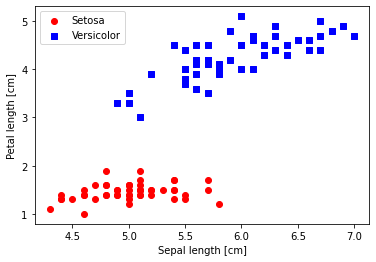

In [53]:
plt.scatter(X[:50, 0], X[:50, 1], color='red', marker='o', label='Setosa')
plt.scatter(X[50:100, 0], X[50:100, 1],color='blue', marker='s', label='Versicolor')
plt.xlabel('Sepal length [cm]')
plt.ylabel('Petal length [cm]')
plt.legend(loc='upper left')
plt.show()

### Training the perceptron model

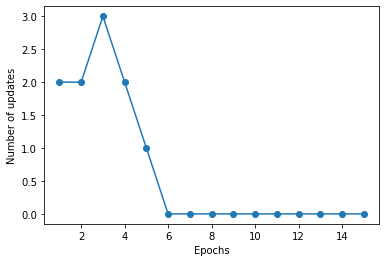

In [55]:
ppn = Perceptron(eta=0.1, n_iter=15)
ppn.fit(X,y)

plt.plot(range(1, len(ppn.errors_) + 1), ppn.errors_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of updates')

plt.show()

In [58]:
ppn.w_, ppn.b_, ppn.errors_

(array([-0.35375655,  0.91388244]),
 -0.2,
 [2, 2, 3, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

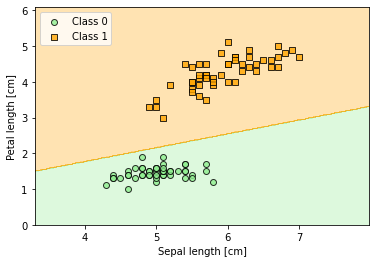

In [96]:
plot_decision_regions(X, y, ppn)
plt.xlabel('Sepal length [cm]')
plt.ylabel('Petal length [cm]')
plt.legend(loc='upper left')
plt.show()

## Adaptive linear neurons and the convergence of learning
ADAptive LInear NEuron (Adaline)